# Validacion Cruzada Estratificada

Es una tecnica que se usa para evaluar modelos de manera mas confiable. Es una variante de la validacion K-Fold donde la division en folds se hace de tal manera que se preservan las proporciones de las clases en cada fold. Esto es especialmente util cuando se trabaja con conjuntos de datos desbalanceados.

## Proceso de la Validacion Cruzada Estratificada

Supongamos que tenemos el siguiente conjunto de datos que consta de una variable predictora (*X*) y una variable objetivo (*y*) que contiene dos clases: 0 y 1.

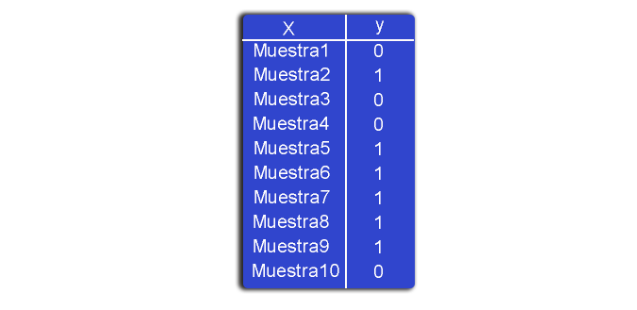

- Datos (X) : [*Muestra1, Muestra2, Muestra3, Muestra4, Muestra5, Muestra6, Muestra7, Muestra8, Muestra9, Muestra10*]

- Etiquetas (y) : [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]

Vamos a realizar una validacion cruzada estratificada K-Fold con $k = 2$. El proceso general de este metodo es el siguiente:

### 1.- Dividir el conjunto de datos por clase

Separamos los datos por clase

- Clase 0 : [*Muestra1, Muestra2, Muestra3, Muestra4*]
- Clase 1 : [*Muestra5, Muestra6, Muestra7, Muestra8, Muestra9, Muestra10*]

### 2.- Dividir cada clase en $k$ Folds
Dividimos cada clase en $k$ folds. En este caso, $k=2$

**Para la clase 0 tenemos 4 muestras**:
- Fold 1 : [*Muestra1, Muestra2*]
- Fold 2 : [*Muestra3, Muestra4*]

**Para la clase 1 tenemos 6 muestras**:
- Fold 1 : [*Muestra5, Muestra6, Muestra7*]
- Fold 2 : [*Muestra8, Muestra9, Muestra10*]

### 3.- Combinar los Folds para crear conjuntos de entrenamiento y prueba

En cada iteracion, combinamos los folds de ambas clases para crear los conjuntos de entrenamiento y prueba

**Iteracion 1:**
- Conjunto test : [*Muestra1, Muestra2, Muestra5, Muestra6, Muestra7*]
- Conjunto train : [*Muestra3, Muestra4, Muestra8, Muestra9, Muestra10*]

**Iteracion 2:**
- Conjunto test : [*Muestra3, Muestra4, Muestra8, Muestra9, Muestra10*]
- Conjunto train : [*Muestra1, Muestra2, Muestra5, Muestra6, Muestra7*]

Este proceso garantiza que cada fold tenga una representación proporcional de cada clase, lo que es crucial para evaluar de manera justa el rendimiento del modelo, especialmente en problemas de clasificación con clases desbalanceadas.

## Implementacion Manual

Vamos a trabajar sobre los datos anteriores (X e y) y realizar el proceso de la validacion cruzada paso a paso, para entender de que se trata.

In [5]:
# libreria para operar arrays
import numpy as np
import pandas as pd

# Datos de ejemplo

# variable predictora
X = np.array(['Muestra1', 'Muestra2', 'Muestra3', 'Muestra4', 'Muestra5', 
              'Muestra6', 'Muestra7', 'Muestra8', 'Muestra9', 'Muestra10'])
#variable objetivo
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

# dataframe con las variables
df = pd.DataFrame({'Muestra': X, 'y':y})

# mostrar dataframe
df

,Muestra,y
0,Muestra1,0
1,Muestra2,0
2,Muestra3,0
3,Muestra4,0
4,Muestra5,1
5,Muestra6,1
6,Muestra7,1
7,Muestra8,1
8,Muestra9,1
9,Muestra10,1


Seleccionamos la cantidad de folds que requerimos

In [6]:
# numero de folds
k = 2

### 1.- Dividir los datos por clase
Seleccionamos los indices de cada clase, que en este caso son dos: Clase de tipo 0 y clase de tipo 1

In [7]:
# indice de cada clase
index_clase0 = np.where(y == 0)[0]
index_clase1 = np.where(y == 1)[0]
print(index_clase0, ' ', index_clase1)

[0 1 2 3]   [4 5 6 7 8 9]


Mezclamos los indices de cada clase para asegurar aleatoriedad en la seleccion

In [8]:
# mezcla aleatoria de los indices
np.random.shuffle(index_clase0)
np.random.shuffle(index_clase1)


### 2.- Dividimos cada clase en $k$ folds
Dividimos los indices en $k$ folds que en este caso decidimos que fueran 2 folds

In [9]:
fold_clase0 = np.array_split(index_clase0, k)
fold_clase1 = np.array_split(index_clase1, k)
print(fold_clase0, ' ', fold_clase1)

[array([1, 0]), array([3, 2])]   [array([6, 5, 8]), array([4, 9, 7])]


### 3.- Combinar los folds
Creamos los folds combinando las clases estratificadas

In [10]:
folds = []
for i in range(k):
    fold = np.concatenate((fold_clase0[i], fold_clase1[i]))
    folds.append(fold)
print(folds)


[array([1, 0, 6, 5, 8]), array([3, 2, 4, 9, 7])]


### 4.- Crear los conjuntos de entrenamiento y prueba
Generamos los conjuntos de entrenamiento y de prueba

In [11]:
for i in range(k):
    # indices de observaciones para prueba
    test_index = folds[i]
    # indice de observaciones para entrenamiento
    train_index = np.concatenate([folds[j] for j in range(k) if j != i])
    # datos de entrenamiento
    X_train, y_train = X[train_index], y[train_index]
    # datos de prueba
    X_test, y_test = X[test_index], y[test_index]
    
    # mostrar conjuntos de cada iteracion
    print(f'Iteracion {i+1}')
    print('Datos de prueba: ', X_test, y_test)
    print('Datos de entrenamiento: ', X_train, y_train)
    print(' ')

Iteracion 1
Datos de prueba:  ['Muestra2' 'Muestra1' 'Muestra7' 'Muestra6' 'Muestra9'] [0 0 1 1 1]
Datos de entrenamiento:  ['Muestra4' 'Muestra3' 'Muestra5' 'Muestra10' 'Muestra8'] [0 0 1 1 1]
 
Iteracion 2
Datos de prueba:  ['Muestra4' 'Muestra3' 'Muestra5' 'Muestra10' 'Muestra8'] [0 0 1 1 1]
Datos de entrenamiento:  ['Muestra2' 'Muestra1' 'Muestra7' 'Muestra6' 'Muestra9'] [0 0 1 1 1]
 


## Implementacion con Python

La validacion cruzada estratificada puede aplicarse de forma directa con el metodo *StratifiedFold* de la libreria SKlearn reduciendo asi, la cantidad de pasos. Vamos a implementarlos sobre los datos anteriores (X e y).

In [12]:
# importamos el metodo de la VC Estratificada 
from sklearn.model_selection import StratifiedKFold

Asignamos la cantidad de folds requeridos

In [13]:
# numero de folds
k = 2

# datos sobre los cuales trabajar
df

,Muestra,y
0,Muestra1,0
1,Muestra2,0
2,Muestra3,0
3,Muestra4,0
4,Muestra5,1
5,Muestra6,1
6,Muestra7,1
7,Muestra8,1
8,Muestra9,1
9,Muestra10,1


Creamos el objetos StratifiedFold

In [14]:
skf = StratifiedKFold(n_splits=k)

Finalmente, realizamos la validacion cruzada estratificada K-Fold sobre los datos X e y

In [17]:

# iteramos sobre los indices del conjunto de entrenamiento y de prueba
for i, (train_index, test_index) in enumerate(skf.split(X,y)):
    # creamos los conjuntos de entrenamiento y de prueba
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # mostramos los 2 folds creados
    print(f"Iteración {i+1}")
    print("Datos de prueba:", X_test, y_test)
    print("Datos de entrenamiento:", X_train, y_train)
    print()
    
    

Iteración 1
Datos de prueba: ['Muestra1' 'Muestra2' 'Muestra5' 'Muestra6' 'Muestra7'] [0 0 1 1 1]
Datos de entrenamiento: ['Muestra3' 'Muestra4' 'Muestra8' 'Muestra9' 'Muestra10'] [0 0 1 1 1]

Iteración 2
Datos de prueba: ['Muestra3' 'Muestra4' 'Muestra8' 'Muestra9' 'Muestra10'] [0 0 1 1 1]
Datos de entrenamiento: ['Muestra1' 'Muestra2' 'Muestra5' 'Muestra6' 'Muestra7'] [0 0 1 1 1]



## Implementacion sobre un Set de datos reales

Vamos a utilizar la validacion cruzada estratificada K-Fold para entrenar y evaluar un modelo de clasificacion. En este ejemplo, utilizaremos un clasificador simple, como un arbol de decision, con el conjunto de datos iris, que es un conjunto de datos comunmente utilizado para problemas de clasificacion.

### Cargar los datos

In [21]:
# importar los datos desde SKlearn
from sklearn.datasets import load_iris
# data
iris = load_iris()
# variables predictoras
X = iris.data
# variable objetivo
y = iris.target
# mostrar datos en un Df
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


### Proceso de validacion cruzada estratificada y entrenamiento del Modelo

Una vez definido las caracteristicas (X) y la variable objetivo (y), definimos el numero de folds requeridos; En este caso seleccionamos 3

In [22]:
# numero de folds
k = 3

Creamos el objeto StratifiedKFold y el Clasificador 

In [23]:
# importamos el modelo de Clasificador
from sklearn.tree import DecisionTreeClassifier

# objetos Strtified
skf = StratifiedKFold(n_splits=k)

# Clasificador
classifier = DecisionTreeClassifier()

Creamos una lista para almacenar las precisiones del modelo en cada iteracion y realizamos la VC Estratificada.

In [24]:
# importamos la metrica utilizada para evaluar el modelo
from sklearn.metrics import accuracy_score

# lista para almacenar precisiones del modelo
precisiones = []

# iteramos sobre cada fold y entrenamos el modelo
for i, (train_index, test_index) in enumerate(skf.split(X,y)):
    
    # creamos el cojunto de entrenamiento y de prueba
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # entrenamos el modelo
    classifier.fit(X_train, y_train)
    
    # obtenemos las predicciones del modelo
    y_pred = classifier.predict(X_test)
    
    # Calculamos la precision del modelo
    precision = accuracy_score(y_test, y_pred)
    
    # almacenamos la precision del modelo
    precisiones.append(precision)

### Mostrar Resultados

Solo queda mostrar la precision de cada Fold y la precision media 

In [25]:
print(f'''
Precision Fold 1: {precisiones[0]}
Precision Fold 2: {precisiones[1]}
Precision Fold 3: {precisiones[2]}
''')

print(f'Precision Media: {np.mean(precisiones)}')


Precision Fold 1: 0.98
Precision Fold 2: 0.92
Precision Fold 3: 1.0

Precision Media: 0.9666666666666667
